In [2]:
import pandas as pd
import string
import re  ## regular expression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/Volumes/Softwares/Instalation/anaconda3/envs/lang-detection/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
## Data Reading
df1 = pd.read_csv('Language Detection.csv')
df2 = pd.read_csv('hindi.csv')

In [10]:
df1

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [11]:
df2

,Text,Language
0,चंद्रमोहन शर्मा को-प्रड्यूसर और लीड ऐक्टर अक्ष...,Hindi
1,अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पह...,Hindi
2,बॉलीवुड वाले चोरी-छिपे हॉलीवुड फिल्मों से कहान...,Hindi
3,"बैनर :\nसंजय दत्त प्रोडक्शन्स प्रा.लि., रुपाली...",Hindi
4,1959 में घटित चर्चित नानावटी कांड में एक क्राइ...,Hindi
...,...,...
713,31 अक्टूबर 1984 को काला दिवस कहा जाता है। इस द...,Hindi
714,\n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...,Hindi
715,Chandermohan.sharma@timesgroup.com ग्लैमर इंडस...,Hindi
716,"निर्माता :\nसुनीता गोवारीकर, अजय बिजली, संजीव ...",Hindi


In [12]:
df = df1.append(df2,ignore_index=True)

In [13]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
11050,31 अक्टूबर 1984 को काला दिवस कहा जाता है। इस द...,Hindi
11051,\n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...,Hindi
11052,Chandermohan.sharma@timesgroup.com ग्लैमर इंडस...,Hindi
11053,"निर्माता :\nसुनीता गोवारीकर, अजय बिजली, संजीव ...",Hindi


In [14]:
##Initial Insights of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      11055 non-null  object
 1   Language  11055 non-null  object
dtypes: object(2)
memory usage: 172.9+ KB


In [15]:
## Print value of all the languages
df.Language.value_counts()

English       1385
French        1014
Spanish        819
Hindi          781
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Name: Language, dtype: int64

In [16]:
df[df.Language == 'Hindi'].sample(2)

,Text,Language
10919,\nकक्षा में उसके विद्यार्थी खूब हंसी उड़ाते है...,Hindi
10453,बॉलीवुड फिल्मों के ज्यादातर सीक्वल निशाने पर न...,Hindi


## Text Preprocessing

In [17]:
def removeSymbolsAndNumbers(text):        
        text = re.sub(r'[{}]'.format(string.punctuation), '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[@]', '', text)

        return text.lower()

In [18]:
def removeEnglishLetters(text):        
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()

In [19]:
X0 = df.apply(lambda x: removeEnglishLetters(x.Text) if x.Language in ['Russian','Malyalam','Hindi','Kannada','Tamil','Arabic']  else x.Text, axis = 1)
X0

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
11050    31 अक्टूबर 1984 को काला दिवस कहा जाता है। इस द...
11051    \n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...
11052    .@. ग्लैमर इंडस्ट्री में आर. बाल्की को बिग बी ...
11053    निर्माता :\nसुनीता गोवारीकर, अजय बिजली, संजीव ...
11054    फोर्स 2 उन अंडरकवर एजेंट्स को समर्पित है जो सम...
Length: 11055, dtype: object

In [20]:
X1 = X0.apply(removeSymbolsAndNumbers)
X1

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
11050     अक्टूबर  को काला दिवस कहा जाता है। इस दिन तत्...
11051    \n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...
11052     ग्लैमर इंडस्ट्री में आर बाल्की को बिग बी का ऐ...
11053    निर्माता \nसुनीता गोवारीकर अजय बिजली संजीव के ...
11054    फोर्स  उन अंडरकवर एजेंट्स को समर्पित है जो समय...
Length: 11055, dtype: object

In [21]:
y = df['Language']
y

0        English
1        English
2        English
3        English
4        English
          ...   
11050      Hindi
11051      Hindi
11052      Hindi
11053      Hindi
11054      Hindi
Name: Language, Length: 11055, dtype: object

## Making Model

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X1, y, random_state=42)

In [23]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [24]:
model = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', LogisticRegression())
])

In [25]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

## Checking for Accuracy

In [26]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [27]:
print("Accuracy is :",accuracy)

Accuracy is : 0.983357452966715


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       134
      Danish       0.97      0.93      0.95       109
       Dutch       0.97      0.95      0.96       139
     English       0.97      0.99      0.98       349
      French       0.99      0.99      0.99       267
      German       0.98      0.97      0.97       118
       Greek       1.00      1.00      1.00        95
       Hindi       1.00      1.00      1.00       190
     Italian       0.98      0.96      0.97       173
     Kannada       1.00      1.00      1.00        89
   Malayalam       1.00      0.99      1.00       156
  Portugeese       0.98      0.97      0.98       186
     Russian       1.00      1.00      1.00       162
     Spanish       0.96      0.98      0.97       193
    Sweedish       0.96      0.97      0.97       171
       Tamil       1.00      1.00      1.00       114
     Turkish       0.98      1.00      0.99       119

    accuracy              

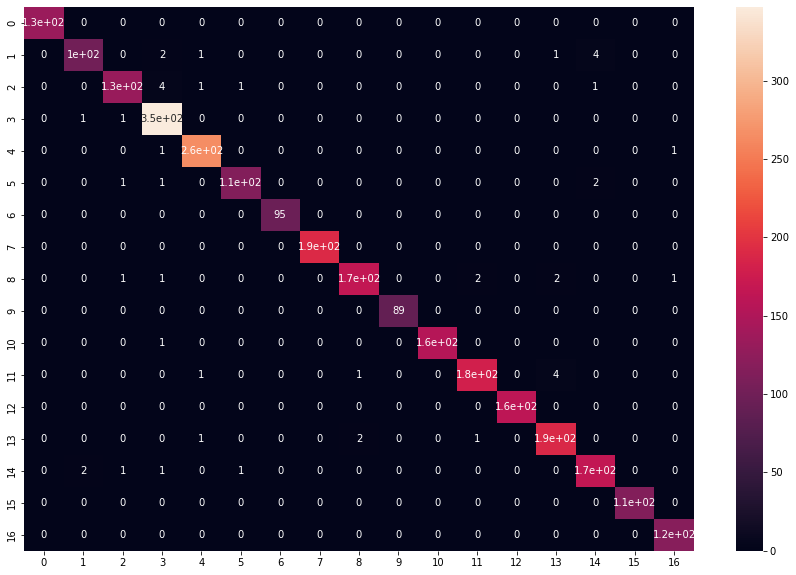

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()


## Testing Model

In [30]:
def predict(text):
    lang = model.predict([text])
    print('The Language is in',lang[0])

In [31]:
import pickle

# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [32]:
model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [34]:
# English
predict("How are you.")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
# Malayalam
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
# Russian
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Hindi
predict('भाषा का पता लगाने वाले मॉडल की जांच')
# Hindi
predict(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')

The Language is in English
The Language is in French
The Language is in Arabic
The Language is in Spanish
The Language is in Malayalam
The Language is in Russian
The Language is in Hindi
The Language is in Hindi


In [ ]:
# import tensorflow as tf
# pb_file = 'finalized_model.sav'
# tflite_file = "tflite_model.tflite"    

# converter = tf.lite.TFLiteConverter.from_saved_model(pb_file)
# tflite_model = converter.convert()